# Investigation 2 - Supervised Learning

## Pattern Recognition MP6122 - Master of Science in Electronics - Emphasis on Embedded Systems

## Costa Rica TEC

Professor: MSc. Felipe Meza
Student: Randy Céspedes Deliyore - ID: 201054417

This notebook would be used to compare the results of doing a bechmark over different supervised learning algorithms over the data set is named **COVID-19 Airline Flight Delays and Cancellations** and can be found [here](https://www.kaggle.com/akulbahl/covid19-airline-flight-delays-and-cancellations).

The processing of this dataset is done in the jupyter notebook named [Investigacion2_Cespedes_Randy.ipynb](https://github.com/rscd27p/Investigacion_2_RP).

The intial dataset was over 600 MB and was reduced to 35 MB.

The dataset would be used to classify delayed flights for their main cause of delay. The classes are:

CC: Carrier Delay.<br/>
WD: Weather Delay.<br/>
ND: NAS Delay.<br/>
SD: Security Delay.<br/>
LAD: Late Aircraft Delay.<br/>

Since there are five different classes, this is considered a _multi-class_ classification problem. 

## Evaluation Metrics or Techniques

Using the right metrics to evaluate an algorithms is key to evaluate their efectivity and have a common ground to compare multiple type of models. The information related to this metric was extracted from this two documents:

$[1]$[20 Popular Machine Learning Metrics. Part 1: Classification & Regression Evaluation Metrics](https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce) by [Shervin Minaee](https://sites.google.com/site/shervinminaee/home), who is a Machine Learning Researcher that holds a PhD in Electrical and Computer Engineering and Computer Science.

$[2]$[Metrics to Evaluate your Machine Learning Algorithm](https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234) by [Aditya Mishra](https://medium.com/@adi_myth).

$[3]$[Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9) by [Koo Ping Shung](https://koopingshung.com/about/).


### 1- Classification Accuracy (Used)

Both articles agree that is a simple metric that allows to keep track of the **ratio of correct predictions**. This is represented by the equation below:

$ Accurracy = \frac{Number of Correct Predictions}{Total Number of Predictions Made} $

Based on **$[1]$** there is a caveat when using it with samples that belong two different classes. For example, Lets asume that we have two classes:

1-Class A.<br/>
2-Class B.<br/>

If we use 98% of elements of Class A and 2% of Class B in our training set, its possible to get a training accurracy of up to 98%. However, if we use 60% of elements from Class A, and 40% from Class B. We can get a value of up to 60% accuracy, which is a good result. However this does not mean that the system is going to recognize a 100% of the samples all the time.

### 2- Logarithmic Loss (Used)

The logaritmic loss ir _log loss_ is used to penalize missclassifications.This works particularly well with multi-class classification algorithms. When using this metric, the classifier must assign a probability for an element belonging to each class for all the samples. The _log loss_ is represented by the following equation:

$ LogaritmicLoss = \frac{-1}{N} \sum_{i=1}^{N}\sum_{j=1}^{M} y_{ij} * log(p_{ij}) $ <br/><br/>
$ N: Samples belonging to M classes $ <br/><br/>
$ M: Classes $ <br/><br/>
$ y_{ij} indicates the probability that sample i belongs to class j or not$ <br/><br/>
$ p_{ij} indicates the probability that sample i belongs to class j$ <br/><br/>

The log loss does not have an upper bound so it means and could have any value from zero to + infinity. The lower the value is to zero the higher is the accuracy.

### 3- Confusion Metric (Used)

A confusion matrix provides a summary of the performance of the whole model. It is easier to use an example to explain it. Lets assume there is a group of 1000 samples that could either be classified as **YES** or **NO**. (This example is adapted from $[2]$).

| Number of Samples= 165 	| Predicted NO 	| Predicted YES 	|
|:----------------------:	|:------------:	|:-------------:	|
|        Actual NO       	|      50      	|       10      	|
|       Actual YES       	|       5      	|      100      	|

Iti s important to understand the four terms in the confusion matrix below:

|   Number of Samples 	|  Predicted NO  	|  Predicted YES 	|
|:----------------------:	|:--------------:	|:--------------:	|
|        Actual NO       	|  True Negative 	| False Positive 	|
|       Actual YES       	| False Negative 	|  True Positive 	|

### 4- F1 Score (Used)

**F1 Score** is a combination of two metrics named:

 - **Precision**: Based on $ [2] $ there are many situations in which the use of the _classification accurancy_ is not a good indicator of performance. For example, in cases where there are multi-class datasets and that there is imbalance, just like in the case of the dataset being used.The idea behind is to create a class-related metric, due to that it has to be done for each class independently and it is define by the following equation:

$ Precision = \frac{True\_Positive}{True\_Positive + False\_Positive} $<br/><br/>

The equation above uses the terms higlighed in the confusion matrix below:

|   Number of Samples 	|  Predicted NO  	|  Predicted YES 	|
|:----------------------:	|:--------------:	|:--------------:	|
|        Actual NO       	|  True Negative 	| <span style="color: red">**False Positive**</span> 	|
|       Actual YES       	| False Negative 	|  <span style="color: red">**True Positive**</span>.	|


 - **Recall**: it is the number of correct positive results divided by the number of all the relevant samples $[1]$. It is define by the following equation:
 
$ Recall = \frac{True\_Positive}{True\_Positive + False\_Positive} $

The equation above uses the terms higlighed in the confusion matrix below:

|   Number of Samples 	|  Predicted NO  	|  Predicted YES 	|
|:----------------------:	|:--------------:	|:--------------:	|
|        Actual NO       	|  True Negative 	| False Positive 	|
|       Actual YES       	| <span style="color: blue">**False Negative**</span> 	|  <span style="color: blue">**True Positive**</span>.	|
 
 <br/><br/>

The equation for the F1 Score is:

$ F1 = 2 * \frac{Precision*Recall}{Precision+Recall} $

**Important:** Precision, Recall and F1 are values between $[0:1]$ that could be represented by percentages by multipying them by a 100.


## Cross Validation and Grid Search

$[4]$[Cross Validation and Grid Search for Model Selection in Python](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/) by [Usman Malik](https://twitter.com/usman_malikk), PhD in artificial Intelligence.

### Cross Validation

In $[4]$ its explained how regularly data is divided into two subgroups:

- **Training Datasets**.
- **Test Datasets**.

It is described how the acurracy obtained with the Training Dataset, used to train the model, could be very different from the one obtained with the Test Sets due to an invariance problems. A solution to this issue is to use K-Fold Cross-Validation. This method is used to divide the dataset into a $ **K** $ number of subdatasets. Then all the datasets except K-1 are used for training and the remaining dataset is used for testing.

+Insert Image+ https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/

### Grid Search

Machine learning models commonly have two kinds of parameters:

- **Learned Parameters:** This parameters are learned by the machine learning model.
- **Hyper Parameters**: The hyper parameters area the ones that are passed to learning model. The comon methodology based on $[4]$ is to randomly set the value of this and which values yield the best results. However, doing this randomly is ineficient and could take a long time. A Grid Search algorithm is one that could help find the best values for these hyper parameters.

## Model Evaluation

The models reviewed in class were:

- **Linear Regression** (Evaluated)
- **Linear Models for Multi-class classification**
- **KNN for classification** (Evaluated)
- **Naive Bayes** (Evaluated)
- **Decision Trees** (Evaluated)
- **Random Forest**
- **Kernel SVM**

### Import General Libraries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Load Dataset

It is important to divide the dataset into testing and training data. It was decided to use 20% of the data for training and 80% for testing.

In [2]:
# Load dataset

FlightsData = pd.read_csv("cleaned_FL_data.csv",index_col=0,  dtype={"MONTH": np.int8,"DAY_OF_MONTH": np.int8,"DAY_OF_WEEK": np.int8,"MKT_UNIQUE_CARRIER": "string",
                                            "ORIGIN": "string","ORIGIN_CITY_NAME": "string","DEST": "string",
                      for                      "DEST_CITY_NAME": "string","CRS_DEP_TIME": np.float64,"DEP_DELAY": np.float64,
                                            "TAXI_OUT": np.float64,"WHEELS_OFF": np.float64,"WHEELS_ON": np.float64,
                                           "TAXI_IN": np.float64,"CRS_ARR_TIME": np.float64,"ARR_DELAY": np.float64,
                                           "ACTUAL_ELAPSED_TIME": np.float64,"CRS_ELAPSED_TIME": np.float64,"AIR_TIME": np.float64,
                                           "DISTANCE": np.float64,"CARRIER_DELAY": np.float64,"WEATHER_DELAY": np.float64,
                                           "NAS_DELAY": np.float64,"SECURITY_DELAY": np.float64,"LATE_AIRCRAFT_DELAY": np.float64,
                                          "DELAY_CAUSE": "string"})
# Show a preview of the dataset

FlightsData.head()

,index,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,...,ARR_DELAY_GROUP,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAY_CAUSE
0,0,1,1,3,WN,ONT,"Ontario, CA",SFO,"San Francisco, CA",1810.0,...,4.0,122.0,74.0,363.0,8.0,0.0,27.0,0.0,33.0,LAD
1,7,1,1,3,WN,ONT,"Ontario, CA",SMF,"Sacramento, CA",1505.0,...,3.0,73.0,66.0,390.0,0.0,0.0,0.0,7.0,40.0,LAD
2,14,1,1,3,WN,ORF,"Norfolk, VA",BWI,"Baltimore, MD",1130.0,...,2.0,47.0,36.0,159.0,6.0,0.0,0.0,0.0,36.0,LAD
3,24,1,1,3,WN,PBI,"West Palm Beach/Palm Beach, FL",ISP,"Islip, NY",755.0,...,11.0,152.0,139.0,1052.0,179.0,0.0,0.0,0.0,0.0,CC
4,29,1,1,3,WN,PDX,"Portland, OR",DEN,"Denver, CO",1310.0,...,1.0,140.0,116.0,991.0,28.0,0.0,0.0,0.0,0.0,CC


One important thing to notice is that the data is organized by month (_MONTH_), and day of the month(_DAY_OF_MONTH_). So its a good idea to shuffle the data in order to get a random organization. This step its important to try to get a more evenly distributed group of flights when dividing the dataset into the testing and training groups. The code below uses **sklearn** to shuffle the data.

In [3]:
# The documentation of this function can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html

# Import the shuffle utility
from sklearn.utils import shuffle

FlightsData = shuffle(FlightsData, random_state=27) # random_state is a the seed of the random number generation for
# organizing the data.

# Preview of data
FlightsData.head()

,index,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,...,ARR_DELAY_GROUP,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAY_CAUSE
9752,78145,1,19,7,NK,LAS,"Las Vegas, NV",MCI,"Kansas City, MO",940.0,...,1.0,156.0,133.0,1139.0,6.0,0.0,1.0,0.0,18.0,LAD
181725,1684871,3,1,7,DL,SLC,"Salt Lake City, UT",DFW,"Dallas/Fort Worth, TX",1400.0,...,1.0,168.0,120.0,989.0,14.0,0.0,12.0,0.0,0.0,CC
116147,957382,2,7,5,DL,SYR,"Syracuse, NY",ATL,"Atlanta, GA",1206.0,...,4.0,179.0,122.0,794.0,18.0,0.0,25.0,0.0,21.0,ND
130958,1080872,2,3,1,AA,SBP,"San Luis Obispo, CA",PHX,"Phoenix, AZ",1631.0,...,10.0,93.0,74.0,509.0,150.0,0.0,0.0,0.0,0.0,CC
145836,1213401,2,18,2,NK,ATL,"Atlanta, GA",TPA,"Tampa, FL",1201.0,...,1.0,78.0,57.0,406.0,0.0,0.0,25.0,0.0,0.0,ND


As it can be see above the dataset was succesfully shuffled.

**Note:** The last column of the dataset where the type of delay is located. So its necessary to separted it

One of the issues discovered is the fact that the Logistic Regression Model does not take string inputs. So an additional preprocessong must be done. Based on the results of the Part I of this investigation. The string columns have a large amount of classes that we could convert to numbers.

In [4]:
FlightsData[['ORIGIN','MKT_UNIQUE_CARRIER','ORIGIN_CITY_NAME','DEST','DEST_CITY_NAME','DELAY_CAUSE']].describe()

,ORIGIN,MKT_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DELAY_CAUSE
count,227679,227679,227679,227679,227679,227679
unique,280,10,274,282,276,5
top,ORD,AA,"Chicago, IL",ORD,"Chicago, IL",CC
freq,12815,70836,14848,11013,12512,87301


For the Delay Type:

|     Column Value    	| Column Value "string" 	| Column Value Numeric 	|
|:-------------------:	|:---------------------:	|:--------------------:	|
|    Carrier Delay    	|           CC          	|           0          	|
|    Weather Delay    	|           WD          	|           1          	|
|      NAS Delay      	|           ND          	|           2          	|
|    Security Delay   	|           SD          	|           3          	|
| Late Aircraft Delay 	|          LAD          	|           4          	|

For the Airlines: 

|    Column Value   	| Column Value "string" 	| Column Value Numeric 	|
|:-----------------:	|:---------------------:	|:--------------------:	|
| American Airlines 	|           AA          	|           0          	|
|  Alaska Airlines  	|           AS          	|           1          	|
|      JetBlue      	|           B6          	|           2          	|
|   Delta Airlines  	|           DL          	|           3          	|
| Frontier Airlines 	|           F9          	|           4          	|
|   Allegiant Air   	|           G4          	|           5          	|
| Hawaiian Airlines 	|           HA          	|           6          	|
|  Spirit Airlines  	|           NK          	|           7          	|
|  United Airlines  	|           UA          	|           8          	|
|     Southwest     	|           WN          	|           9          	|


In [5]:
# Define dictionaries 
DC_dict = {'CC':0,'WD':1,'ND':2,'SD':3,'LAD':4}
MUC_dict = {'AA':0,'AS':1,'B6':2,'DL':3,'F9':4,'G4':5,'HA':6,'NK':7,'UA':8,'WN':9,}

# Replace delay cause and airline values to numbers
FlightsData[['DELAY_CAUSE']] = [DC_dict[item] for item in FlightsData['DELAY_CAUSE']]
FlightsData[['MKT_UNIQUE_CARRIER']] = [MUC_dict[item] for item in FlightsData['MKT_UNIQUE_CARRIER']]

The method above could be apply to columns with a small number of unique classes. However, for the ORIGIN, ORIGIN_CITY_NAME, DEST , and DEST_CITY_NAME columns it is not feasable to do it manually. Due to that the methodology described in the document named [Python | Convert two lists into a dictionary](https://www.geeksforgeeks.org/python-convert-two-lists-into-a-dictionary/) would be used.

In [6]:
# Define Lists of Classes for each column

origin_classes = FlightsData[['ORIGIN']].value_counts().index.levels[0]
origincitynames_classes = FlightsData[['ORIGIN_CITY_NAME']].value_counts().index.levels[0]
dest_classes = FlightsData[['DEST']].value_counts().index.levels[0]
destcitynames_classes = FlightsData[['DEST_CITY_NAME']].value_counts().index.levels[0]

# Create dictionaries indexes lists based on the lenght of the list of classes above.

origin_classes_idxs = list(range(0,len(origin_classes)))
origincitynames_classes_idxs = list(range(0,len(origincitynames_classes)))
dest_classes_idxs = list(range(0,len(dest_classes)))
destcitynames_classes_idxs = list(range(0,len(destcitynames_classes)))

# build dictionaries
# ORIGIN
origin_dict = {}
for key in origin_classes: 
    for value in origin_classes_idxs: 
        origin_dict[key] = value 
        origin_classes_idxs.remove(value) 
        break
# ORIGIN_CITY_NAME
origincitynames_dict = {}
for key in origincitynames_classes: 
    for value in origincitynames_classes_idxs: 
        origincitynames_dict[key] = value 
        origincitynames_classes_idxs.remove(value) 
        break
# DEST        
dest_dict = {}
for key in dest_classes: 
    for value in dest_classes_idxs: 
        dest_dict[key] = value 
        dest_classes_idxs.remove(value) 
        break
# DEST_CITY_NAME        
destcitynames_dict = {}
for key in destcitynames_classes: 
    for value in destcitynames_classes_idxs: 
        destcitynames_dict[key] = value 
        destcitynames_classes_idxs.remove(value) 
        break

# Replace delay cause values to numbers
FlightsData['ORIGIN'] = [origin_dict[item] for item in FlightsData['ORIGIN']]
FlightsData['ORIGIN_CITY_NAME'] = [origincitynames_dict[item] for item in FlightsData['ORIGIN_CITY_NAME']]
FlightsData['DEST'] = [dest_dict[item] for item in FlightsData['DEST']]
FlightsData['DEST_CITY_NAME'] = [destcitynames_dict[item] for item in FlightsData['DEST_CITY_NAME']]

# Preview the data
FlightsData[['ORIGIN','MKT_UNIQUE_CARRIER','ORIGIN_CITY_NAME','DEST','DEST_CITY_NAME','DELAY_CAUSE']].describe()

,ORIGIN,MKT_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DELAY_CAUSE
count,227679.000000,227679.000000,227679.000000,227679.000000,227679.000000,227679.000000
mean,129.381748,3.877152,126.019330,132.434274,130.754663,1.950334
std,76.919137,3.539755,78.144612,77.615793,78.837391,1.757194
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,0.000000,49.000000,64.000000,59.000000,0.000000
50%,130.000000,3.000000,125.000000,137.000000,138.000000,2.000000
75%,191.000000,8.000000,194.000000,199.000000,198.000000,4.000000
max,279.000000,9.000000,273.000000,281.000000,275.000000,4.000000


In [7]:
# Get Results column
delay_results = FlightsData['DELAY_CAUSE']
# Get Parameters
delay_parameters = FlightsData.drop(columns = 'DELAY_CAUSE')

# Print Data Frame shape

print("Delay results size: " + str(delay_results.shape))
print("Delay Parameters size: " + str(delay_parameters.shape))

Delay results size: (227679,)
Delay Parameters size: (227679, 27)


As it can be seen above, the results and parameters have the right shape.

## Logistic Regression in Python

The logistic regression is the first type of classification algorithm to be tested. The online document named [Logistic Regression in Python](https://realpython.com/logistic-regression-python/) by Mirk Stojiljkovic was used as reference.

In the section below the sklearn logistic regression model is imported and also some metric utilities like a confussion matrix, and a classification report. The classification report documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). This report provides all the information below for each class. This would be very useful to avoid having to manually calculate this metrics.

- **Precision**.
- **Recall**.
- **F1 Score**.

The code below is to create the model.

In [13]:
# import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Import Classification Report and Confussion Matrix
from sklearn.metrics import classification_report, confusion_matrix

# Create Logistic Regression Model
LR_model =  LogisticRegression(solver='liblinear', random_state=0, multi_class = 'auto',max_iter=200)

# Also the muti_class option was selected to ovr based on the fact that there is a binary fit for each label.
# this was choosen on the same document above.

It is imporant to separete the data in train and test data. It was decided to use the *train_test_split* utility from sklearn documented [here](https://realpython.com/train-test-split-python-data/).

In [14]:
# Import train_test_split utility

from sklearn.model_selection import train_test_split

# As it described here: https://realpython.com/train-test-split-python-data/ it is possible separate both input, 
# output data at the same time.

delay_parameters_train, delay_parameters_test, delay_results_train, delay_results_test = train_test_split(
    delay_parameters, delay_results, test_size = 0.2, random_state = 25) # Train 80%, Test 20%

Train the model. **Note:** This process could take a long time. Up to 5 minutes depending on your system resources.

In [15]:
LR_model.fit(delay_parameters_train, delay_results_train)

LogisticRegression(max_iter=200, random_state=0, solver='liblinear')

Now that the model has been compiles the next step is to evaluate its performance for the model.

In [16]:
print("Training set score: {:.3f}".format(LR_model.score(delay_parameters_train, delay_results_train)))
print("Test set score: {:.3f}".format(LR_model.score(delay_parameters_test, delay_results_test)))

Training set score: 0.971
Test set score: 0.969


Now we will evaluate the rest of the metrics, starting by the confusion matrix. For this we will use the sklearn confusion matrix imported at the beggining of this section.

Confusion Matrix Logistic Regression
[[17235     0   109     0    88]
 [    8  1768    82     0    62]
 [  257     2  8177     0   426]
 [    3     0    19    21    66]
 [   44     0   229     0 16940]]


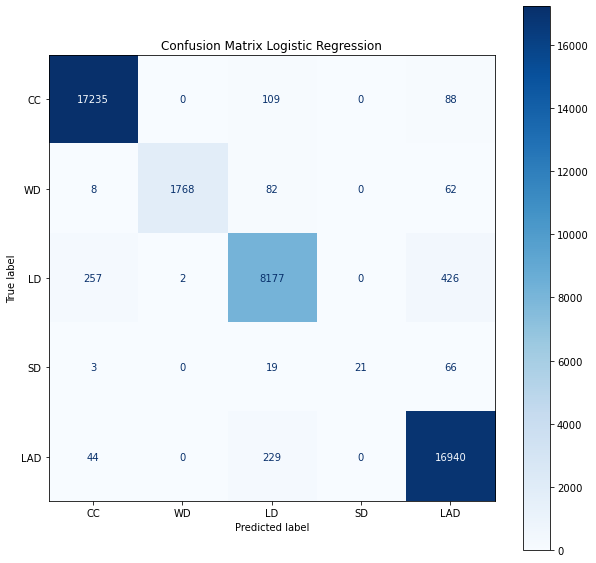

In [17]:
# import multi label confusion matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix


# Confusion Matrix
disp, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(LR_model,delay_parameters_test, delay_results_test,labels = 
                             [0,1,2,3,4],cmap=plt.cm.Blues,ax=ax)

# Plot confusion matrix
title = "Confusion Matrix Logistic Regression"

ax.set_title(title)
x_ticks_labels = ['CC','WD','LD','SD','LAD']
plt.xticks([0,1,2,3,4],x_ticks_labels)
plt.yticks([0,1,2,3,4],x_ticks_labels)
print(title)
print(disp.confusion_matrix)

plt.show()

As it can be seen above the results are quite good. Unfortunately there were not a lot of elements from the SD class. Now we would compute the rest of the metrics.

In [18]:
from sklearn.metrics import classification_report

# Class names

delay_results_test_predicted = LR_model.predict(delay_parameters_test)

class_names = ['CC','WD','LD','SD','LAD']
print(classification_report(delay_results_test, delay_results_test_predicted, target_names=class_names))

              precision    recall  f1-score   support

          CC       0.98      0.99      0.99     17432
          WD       1.00      0.92      0.96      1920
          LD       0.95      0.92      0.94      8862
          SD       1.00      0.19      0.32       109
         LAD       0.96      0.98      0.97     17213

    accuracy                           0.97     45536
   macro avg       0.98      0.80      0.84     45536
weighted avg       0.97      0.97      0.97     45536



The results for most of the classes were over 90%, which means that the model was good at predicting delay causes. However, the LD class had a very little amount of samples so the result ended up with a low F1 score of only 32%.

We will calculate the **Log Loss** now

In [41]:
# Import Log Loss

from sklearn.metrics import log_loss

# Calculate Predict Probability

delay_results_test_prep.ob = LR_model.predict_log_proba(delay_parameters_test) 

# This provides the probability of each flight belonging to one of the five classes.

LogLoss = log_loss(delay_results_test, delay_results_test_prepob)

# Pring Results

print("Log Loss: {:.3f}".format((LogLoss)))

Log Loss: 1.609


**Summary of Results**

|      Model Name     	| Accuracy 	| Log Loss 	| F1-score 	| Precision 	| Recall 	|
|:-------------------:	|:--------:	|:--------:	|:--------:	|:---------:	|:------:	|
| Logistic Regression 	|   0.969  	|   1.609  	|   0.84   	|    0.98   	|  0.80  	|


## KNN for classification

The K nearest neighbors algoritm is another classification model. In the section below we configure the model. However, since the K has a dirrect in accuracy we would perform a procedure similar to what was done in class to estimate which number of neighbor K has the best accuracy with the Test and Training data.

**Note:** The process below could take up to 5 minutes.

Training set score: 1.000 -> K = 1
Test set score: 0.503 -> K = 1
Training set score: 0.756 -> K = 2
Test set score: 0.478 -> K = 2
Training set score: 0.726 -> K = 3
Test set score: 0.511 -> K = 3
Training set score: 0.688 -> K = 4
Test set score: 0.509 -> K = 4
Training set score: 0.666 -> K = 5
Test set score: 0.510 -> K = 5
Training set score: 0.648 -> K = 6
Test set score: 0.515 -> K = 6
Training set score: 0.638 -> K = 7
Test set score: 0.515 -> K = 7
Training set score: 0.626 -> K = 8
Test set score: 0.517 -> K = 8
Training set score: 0.618 -> K = 9
Test set score: 0.519 -> K = 9
Training set score: 0.613 -> K = 10
Test set score: 0.519 -> K = 10


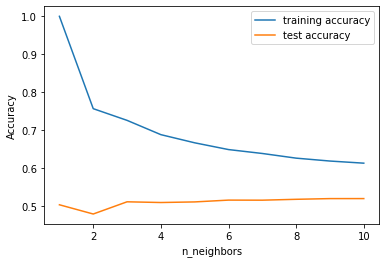

In [52]:
# Import K Nearest Neighbors 
from sklearn.neighbors .import KNeighborsClassifier

# Setup Test and Train Data

delay_parameters_train,. delay_parameters_test, delay_results_train, delay_results_test = train_test_split(
    delay_parameters, delay_results, test_size = 0.2, random_state = 25) # Train 80%, Test 20%

# Train Model for multiple K values 
# This was adapted from the class example here: https://sites.google.com/view/mp6122-tec-1q21/class-2

# Setup Arrays to keep accuracy data
Train_Accuracy_KNN = []
Test_Accuracy_KNN = []
Log_Loss_KNN = []

neighbors_settings = range(1, 11) # Test up to 10
for n_neighbors in neighbors_settings:
    # Setup Model with "Ball Three Algorithm"
    
    KNN_model = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm='ball_tree', leaf_size = 30)
    KNN_model.fit(delay_parameters_train, delay_results_train)
    
    # Pring Accuracy Results
    
    train_acc= KNN_model.score(delay_parameters_train, delay_results_train)
    Train_Accuracy_KNN.append(train_acc)
    
    test_acc = KNN_model.score(delay_parameters_test, delay_results_test)
    Test_Accuracy_KNN.append(test_acc)
    
    print("Training set score: {:.3f}".format(train_acc) + " -> K = " + str(n_neighbors))
    print("Test set score: {:.3f}".format(test_acc)+ " -> K = " + str(n_neighbors))
    
    
plt.plot(neighbors_settings, Train_Accuracy_KNN, label="training accuracy")
plt.plot(neighbors_settings, Test_Accuracy_KNN, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("KNN with Ball Tree Algorithm")
plt.legend()

As it can bee seen above the use of "ball tree" algoritm was not very succesful. The _kd_tree_ algorithm would be tried next. **Note:** The process below could take up to 5 minutes.

Training set score: 1.000 -> K = 1
Test set score: 0.503 -> K = 1
Training set score: 0.756 -> K = 2
Test set score: 0.478 -> K = 2
Training set score: 0.726 -> K = 3
Test set score: 0.511 -> K = 3
Training set score: 0.688 -> K = 4
Test set score: 0.509 -> K = 4
Training set score: 0.666 -> K = 5
Test set score: 0.510 -> K = 5
Training set score: 0.648 -> K = 6
Test set score: 0.515 -> K = 6
Training set score: 0.638 -> K = 7
Test set score: 0.515 -> K = 7
Training set score: 0.626 -> K = 8
Test set score: 0.517 -> K = 8
Training set score: 0.618 -> K = 9
Test set score: 0.519 -> K = 9
Training set score: 0.613 -> K = 10
Test set score: 0.519 -> K = 10


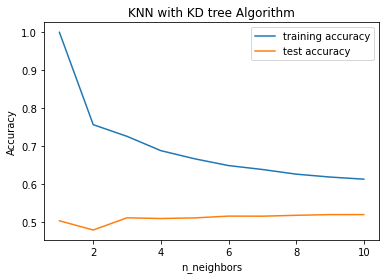

In [53]:
# Train Model for multiple K values 
# This was adapted from the class example here: https://sites.google.com/view/mp6122-tec-1q21/class-2

# Setup Arrays to keep accuracy data
Train_Accuracy_KNN = []
Test_Accuracy_KNN = []
Log_Loss_KNN = []

neighbors_settings = range(1, 11) # Test up to 10
for n_neighbors in neighbors_settings:
    # Setup Model with "Ball Three Algorithm"
    
    KNN_model = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm='kd_tree', leaf_size = 30)
    KNN_model.fit(delay_parameters_train, delay_results_train)
    
    # Pring Accuracy Results
    
    train_acc= KNN_model.score(delay_parameters_train, delay_results_train)
    Train_Accuracy_KNN.append(train_acc)
    
    test_acc = KNN_model.score(delay_parameters_test, delay_results_test)
    Test_Accuracy_KNN.append(test_acc)
    
    print("Training set score: {:.3f}".format(train_acc) + " -> K = " + str(n_neighbors))
    print("Test set score: {:.3f}".format(test_acc)+ " -> K = " + str(n_neighbors))
    
    
plt.plot(neighbors_settings, Train_Accuracy_KNN, label="training accuracy")
plt.plot(neighbors_settings, Test_Accuracy_KNN, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("KNN with KD tree Algorithm")
plt.legend()

The result of using **KD Tree** is basically the same and it appears that the number of neighbors does not have an effect on how good the algorithm is. We would try with the "auto" setting in the algorithm parameter and with a large number of neighbors like a 100.

**Note:** The process could take up to 5 minutes.

In [58]:
# Setup Model with "Ball Three Algorithm"

KNN_model = KNeighborsClassifier(n_neighbors=100, algorithm='auto', leaf_size = 50)
KNN_model.fit(delay_parameters_train, delay_results_train)

# Pring Accuracy Results

train_acc= KNN_model.score(delay_parameters_train, delay_results_train)

test_acc = KNN_model.score(delay_parameters_test, delay_results_test)

print("Training set score: {:.3f}".format(train_acc) + " -> K = " + str(100))
print("Test set score: {:.3f}".format(test_acc)+ " -> K = " + str(100))

Training set score: 0.528 -> K = 100
Test set score: 0.515 -> K = 100


As it can be seen above the number of neighbors practically had no effect in the result. The rest of the metrics would be calculated.

Confusion Matrix KNN Neighbors K=100
[[ 9482    17   891     0  7042]
 [ 1096    24   140     0   660]
 [ 3073    11  1394     0  4384]
 [   53     0    10     0    46]
 [ 3779     0   889     0 12545]]


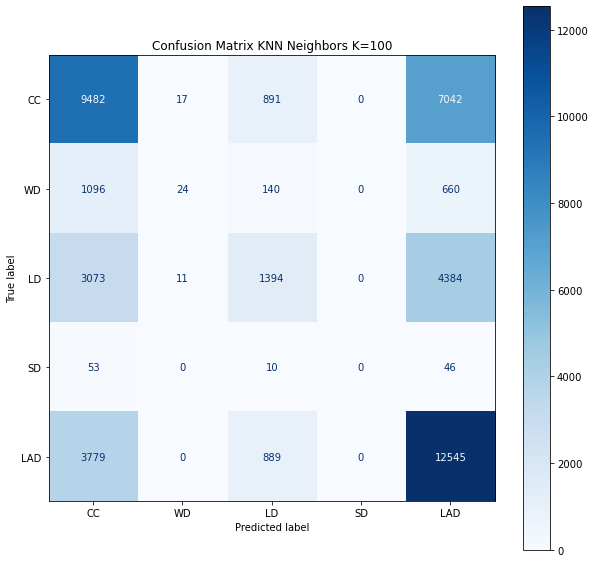

In [59]:
# Confusion Matrix
disp, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(KNN_model,delay_parameters_test, delay_results_test,labels = [0,1,2,3,4],
                             cmap=plt.cm.Blues,ax=ax)

# Plot confusion matrix
title = "Confusion Matrix KNN Neighbors K=100"

ax.set_title(title)
x_ticks_labels = ['CC','WD','LD','SD','LAD']
plt.xticks([0,1,2,3,4],x_ticks_labels)
plt.yticks([0,1,2,3,4],x_ticks_labels)
print(title)
print(disp.confusion_matrix)

plt.show()

In [64]:
# Calculate Predict Probability

delay_results_test_prep = KNN_model.predict_proba(delay_parameters_test) 

# This provides the probability of each flight belonging to one of the five classes.

LogLoss = log_loss(delay_results_test, delay_results_test_prep)

# Print Results

print("Log Loss: {:.3f}".format((LogLoss)))

# Class names

delay_results_test_predicted = KNN_model.predict(delay_parameters_test)

class_names = ['CC','WD','LD','SD','LAD']
print(classification_report(delay_results_test, delay_results_test_predicted, target_names=class_names))

Log Loss: 1.168
              precision    recall  f1-score   support

          CC       0.54      0.54      0.54     17432
          WD       0.46      0.01      0.02      1920
          LD       0.42      0.16      0.23      8862
          SD       0.00      0.00      0.00       109
         LAD       0.51      0.73      0.60     17213

    accuracy                           0.51     45536
   macro avg       0.39      0.29      0.28     45536
weighted avg       0.50      0.51      0.48     45536



/home/rscd27/miniconda3/envs/py3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Summary of Results

|        Model Name        	| Accuracy 	| Log Loss 	| F1-score 	| Precision 	| Recall 	|
|:------------------------:	|:--------:	|:--------:	|:--------:	|:---------:	|:------:	|
| KNN Classification k=100 	|   0.515  	|   1.168  	|   0.28   	|    0.39   	|  0.29  	|

## Categorical Naive Bayes
'priors' is an invalid keyword argument for str()
Documentation for the method can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html).

All of the metrics would be calculated and then presented.

In [109]:
# Import Model

from sklearn.naive_bayes import GaussianNB

# Setup Test and Train Data

delay_parameters_train, delay_parameters_test, delay_results_train, delay_results_test = train_test_split(
    delay_parameters, delay_results, test_size = 0.50, random_state = 40) # Train 80%, Test 20%

print("delay_parameters_test shape: " + str(delay_parameters_test.shape))
print("delay_results_test shape: " + str(delay_results_test.shape))

# Calculate Classes weights
class_counts = delay_results_test.value_counts()
class_counts_total = delay_results_test.value_counts().sum()
class_weights = []
for idx in range(0,len(class_counts)):
    class_weight = class_counts[idx] / class_counts_total
    class_weights.append(class_weight)

print("Class weights: " + str(class_weights))

# Class labels
class_labels = ['CC','WD','LD','SD','LAD']

# Setup Model

GaussNB_model = GaussianNB()
GaussNB_model.fit(delay_parameters_train, delay_results_train)

# Calculate Accuracy

print("Training set score: {:.3f}".format(GaussNB_model.score(delay_parameters_train, delay_results_train)))

print("Test set score: {:.3f}".format(GaussNB_model.score(delay_parameters_test, delay_results_test)))

delay_parameters_test shape: (113840, 27)
delay_results_test shape: (113840,)
Class weights: [0.3840917076598735, 0.0416988756148981, 0.19314827828531272, 0.002371749824314828, 0.37868938861560086]
Training set score: 0.739
Test set score: 0.738


The training and test score are 73.9% and 73.8% respectivily. This method has clearer results than the KNN method.

Confusion Matrix KNN Neighbors K=100
[[29287     0  2918    35 11485]
 [  647  2172   521     2  1405]
 [ 1372     6 15309     1  5300]
 [   71     0    48    27   124]
 [ 2895    11  2927     5 37272]]


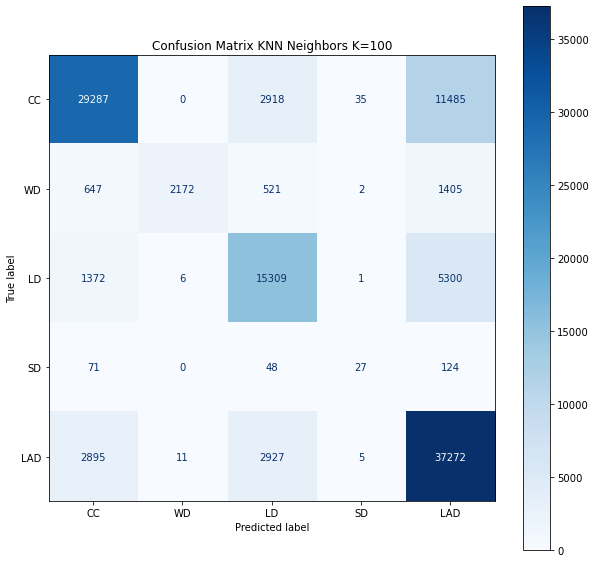

Log Loss: 0.639
              precision    recall  f1-score   support

          CC       0.85      0.67      0.75     43725
          WD       0.99      0.46      0.63      4747
          LD       0.70      0.70      0.70     21988
          SD       0.39      0.10      0.16       270
         LAD       0.67      0.86      0.76     43110

    accuracy                           0.74    113840
   macro avg       0.72      0.56      0.60    113840
weighted avg       0.76      0.74      0.74    113840



In [110]:
# Confusion Matrix
disp, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(GaussNB_model,delay_parameters_test, delay_results_test,labels = [0,1,2,3,4],
                             cmap=plt.cm.Blues,ax=ax)

# Plot confusion matrix
title = "Confusion Matrix Naive Bayes NB"

ax.set_title(title)
x_ticks_labels = ['CC','WD','LD','SD','LAD']
plt.xticks([0,1,2,3,4],x_ticks_labels)
plt.yticks([0,1,2,3,4],x_ticks_labels)
print(title)
print(disp.confusion_matrix)

plt.show()

# Calculate Predict Probability

delay_results_test_prep = GaussNB_model.predict_proba(delay_parameters_test) 

# This provides the probability of each flight belonging to one of the five classes.

LogLoss = log_loss(delay_results_test, delay_results_test_prep)

# Print Results

print("Log Loss: {:.3f}".format((LogLoss)))

# Class names

delay_results_test_predicted = GaussNB_model.predict(delay_parameters_test)

class_names = ['CC','WD','LD','SD','LAD']
print(classification_report(delay_results_test, delay_results_test_predicted, target_names=class_names))

A summary of the results above is presented:

|       Model Name       	| Accuracy 	| Log Loss 	| F1-score 	| Precision 	| Recall 	|
|:----------------------:	|:--------:	|:--------:	|:--------:	|:---------:	|:------:	|
| Naive Bayes GaussianNB 	|   0.738  	|   0.639  	|   0.60   	|    0.72   	|  0.56  	|